<a href="https://colab.research.google.com/github/anubhabdg7/genetic-programming/blob/main/Cartesian_Genetic_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import math

In [2]:
import operator as op
import random
import copy
import math
#from settings import VERBOSE, N_COLS, LEVEL_BACK


class Function:
    """
    A general function
    """

    def __init__(self, f, arity, name=None):
        self.f = f
        self.arity = arity
        self.name = f.__name__ if name is None else name

    # def __call__(self, *args, **kwargs):
    #     return self.f(*args, **kwargs)


class Node:
    """
    A node in CGP graph
    """
    def __init__(self, max_arity):
        """
        Initialize this node randomly
        """
        self.i_func = None
        self.i_inputs = [None] * max_arity
        
        self.i_output = None
        self.output = None
        self.active = False


class Individual:
    """
    An individual (chromosome, genotype, etc.) in evolution
    """
   

    def __init__(self):
        self.function_set = None
    
        self.max_arity = 2
        self.n_inputs = 2
        self.n_outputs = 3
        self.n_cols = 100
        fs = [Function(op.add, 2),Function(op.mul,2),Function(op.sub,2),Function(protected_div,2)]
        self.function_set = fs
        self.max_arity = max(f.arity for f in fs)
    
        self.nodes = []
        for pos in range(self.n_cols):
            self.nodes.append(self._create_random_node(pos))
        for i in range(self.n_outputs):
            self.nodes[i].active = True
        self.fitness = None
        self._active_determined = False
        
          
        

        


    def _create_random_node(self, pos):
        node = Node(self.max_arity)
        node.i_func = random.randint(0, len(self.function_set) - 1)
        for i in range(self.function_set[node.i_func].arity):
            node.i_inputs[i] = random.randint(0, pos+1)
            
        node.i_output = pos

        return node

    # def _determine_active_nodes(self):
    #     """
    #     Determine which nodes in the CGP graph are active
    #     """
    #     # check each node in reverse order
    #     n_active = 0
    #     for node in reversed(self.nodes):
    #         if node.active:
    #             n_active += 1
    #             for i in range(self.function_set[node.i_func].arity):
    #                 i_input = node.i_inputs[i]
    #                 if i_input >= 0:  # a node (not an input)
    #                     self.nodes[i_input].active = True
        
    #     print("# active genes: ", n_active)

    def eval(self,x,y,a,b,c):

      out=np.zeros((200))
      output=[]
      output2=[]
      for i in range(100):
        if self.nodes[i].i_inputs[0]>i+1 or self.nodes[i].i_inputs[1]>i+1 :
          self.nodes[i].active= False
        else :
          self.nodes[i].active=True
      out[0]=x
      out[1]=y
      for i in range(100):
        if self.nodes[i].active :
          out[i+2]=(self.function_set[self.nodes[i].i_func].f(out[self.nodes[i].i_inputs[0]],out[self.nodes[i].i_inputs[1]]))
          
      
      output.append(random.randint(0,101))
      output.append(random.randint(0,101))
      output.append(random.randint(0,101)) 
       
      output2.append(out[a])
      output2.append(out[b])
      output2.append(out[c])
      return output2





        # """
        # Given inputs, evaluate the output of this CGP individual.
        # :return the final output value
        # """
        # if not self._active_determined:
        #     self._determine_active_nodes()
        #     self._active_determined = True
        # forward pass: evaluate
        # for node in self.nodes:
        #     if node.active:
        #         inputs = []
        #         for i in range(self.function_set[node.i_func].arity):
        #             i_input = node.i_inputs[i]
        #             w = node.weights[i]
        #             # if i_input < 0:
        #             #     inputs.append(args[-i_input - 1] * w)
        #             # else:
        #             #     inputs.append(self.nodes[i_input].output * w)
        #             inputs.append(self.nodes[i_input])
        #         node.output = self.function_set[node.i_func](*inputs)
        #     print(self.nodes.output)

    # def mutate(self, mut_rate=0.01):
    #     """
    #     Mutate this individual. Each gene is varied with probability *mut_rate*.
    #     :param mut_rate: mutation probability
    #     :return a child after mutation
    #     """
    #     child = copy.deepcopy(self)
    #     for pos, node in enumerate(child.nodes):
    #         # mutate the function gene
    #         if random.random() < mut_rate:
    #             node.i_func = random.choice(range(len(self.function_set)))
    #         # mutate the input genes (connection genes)
    #         arity = self.function_set[node.i_func].arity
    #         for i in range(arity):
    #             if node.i_inputs[i] is None or random.random() < mut_rate:  # if the mutated function requires more arguments, then the last ones are None 
    #                 node.i_inputs[i] = random.randint(max(pos - self.level_back, -self.n_inputs), pos - 1)
    #             if node.weights[i] is None or random.random() < mut_rate:
    #                 node.weights[i] = random.uniform(self.weight_range[0], self.weight_range[1])
    #         # initially an individual is not active except hte last output node
    #         node.active = False
    #     for i in range(1, self.n_outputs + 1):
    #         child.nodes[-i].active = True
    #     child.fitness = None
    #     child._active_determined = False
    #     return child


# function set
def protected_div(a, b):
    if abs(b) < 1e-6:
        return a
    return a / b




# def evolve(pop, mut_rate, mu, lambda_):
#     """
#     Evolve the population *pop* using the mu + lambda evolutionary strategy
#     :param pop: a list of individuals, whose size is mu + lambda. The first mu ones are previous parents.
#     :param mut_rate: mutation rate
#     :return: a new generation of individuals of the same size
#     """
#     pop = sorted(pop, key=lambda ind: ind.fitness)  # stable sorting
#     parents = pop[-mu:]
#     # generate lambda new children via mutation
#     offspring = []
#     for _ in range(lambda_):
#         parent = random.choice(parents)
#         offspring.append(parent.mutate(mut_rate))
#     return parents + offspring


# def create_population(n):
#     """
#     Create a random population composed of n individuals.
#     """
#     return [Individual() for _ in range(n)]


In [13]:
I=Individual()


In [19]:
I1=Individual()

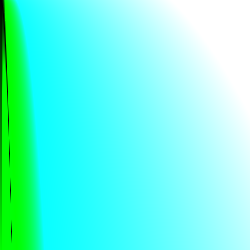

-1

In [14]:
output1=[]
img=np.zeros((250,250,3))
for i in range(250):
  for j in range(250):
    output1=I.eval(i,j,25,50,100)
    for k in range(3):
      if output1[k]>255 :
        output1[k]=255
      if output1[k]<0 :
        output1[k]=-1*output1[k]
    img[i][j][0]=output1[0]
    img[i][j][1]=output1[1]
    img[i][j][2]=output1[2]

cv2_imshow(img)
cv2.waitKey(0)

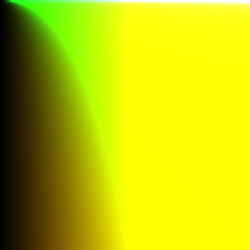

-1

In [20]:
output1=[]
img=np.zeros((250,250,3))
for i in range(250):
  for j in range(250):
    output1=I1.eval(i,j,25,50,100)
    for k in range(3):
      if output1[k]>255 :
        output1[k]=255
      if output1[k]<0 :
        output1[k]=-1*output1[k]
    img[i][j][0]=output1[0]
    img[i][j][1]=output1[1]
    img[i][j][2]=output1[2]

cv2_imshow(img)
cv2.waitKey(0)

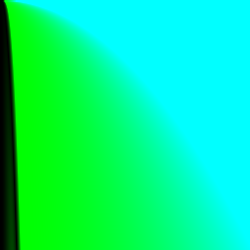

-1

In [21]:
gene=[]
for i in range(50):
  gene.append(random.randint(0,99))
  I1.nodes[gene[i]]=I.nodes[gene[i]]

output1=[]
img=np.zeros((250,250,3))
for i in range(250):
  for j in range(250):
    output1=I1.eval(i,j,90,50,69)
    for k in range(3):
      
      if output1[k]>255 :
        output1[k]=255
      if output1[k]<0 :
        output1[k]=-1*output1[k]
    img[i][j][0]=output1[0]
    img[i][j][1]=output1[1]
    img[i][j][2]=output1[2]

cv2_imshow(img)
cv2.waitKey(0)


